In [88]:


import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb



In [89]:


import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns



In [90]:


# data=pd.read_csv(data)
# 解决'utf-8' codec can't decode byte 0xa8 in position 12743: invalid start byte这个问题，然后成功导入
data=pd.read_csv("imdb.csv",encoding='utf-8')

In [91]:


data.head()



,sentimenttext,sentiment
0,this film was just brilliant casting location ...,1
1,big hair big boobs bad music and a giant safet...,0
2,this has to be one of the worst films of the 1...,0
3,the scots excel at storytelling the traditiona...,1
4,worst mistake of my life br br i picked this m...,0


In [92]:


data.shape



(25000, 2)

<AxesSubplot:ylabel='sentiment'>

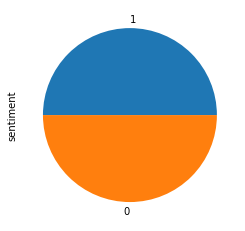

In [93]:


data.sentiment.value_counts().plot(kind="pie")



In [94]:


x=data["sentimenttext"]
x



0        this film was just brilliant casting location ...
1        big hair big boobs bad music and a giant safet...
2        this has to be one of the worst films of the 1...
3        the scots excel at storytelling the traditiona...
4        worst mistake of my life br br i picked this m...
                               ...                        
24995    this is a racist movie but worthy of study and...
24996    bela lugosi plays a doctor who will do anythin...
24997    in a far away galaxy is a planet called ceta i...
24998    six degrees had me hooked i looked forward to ...
24999    as a big fan of the original film it's hard to...
Name: sentimenttext, Length: 25000, dtype: object

In [95]:


y=data["sentiment"]



In [96]:


from sklearn.feature_extraction.text import TfidfVectorizer
# 导入停用词
from nltk.corpus import stopwords

In [97]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [98]:


#将文本转换为数字
#max_features 属性指定最多应使用 2,000 个出现次数最多的词来创建特征词典
# min_df 属性指定只包含在所有文档中出现至少五次的单词。Max_df 定义不包括出现在超过 70% 的文档中的词。
vectorizer=TfidfVectorizer(max_features=2000,min_df=5,max_df=0.7,stop_words=stopwords.words("english"))
x=vectorizer.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
print(x.shape)

(25000, 2000)


In [100]:


from sklearn.model_selection import train_test_split



In [101]:


#将数据划分为训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)



In [102]:


from sklearn.ensemble import RandomForestClassifier



In [103]:


#确定随机森林中树的数量和随机状态
clf=RandomForestClassifier(n_estimators=250,random_state=0)
clf

RandomForestClassifier(n_estimators=250, random_state=0)

In [104]:


#训练模型
clf.fit(x_train,y_train)



RandomForestClassifier(n_estimators=250, random_state=0)

In [105]:


#对测试数据进行预测
y_pred=clf.predict(x_test)



In [106]:


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



In [107]:


#混淆矩阵查看分类情况
print(confusion_matrix(y_test,y_pred))



[[2131  399]
 [ 362 2108]]


In [108]:


#准确率、召回率和 F1 度量分类情况
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2530
           1       0.84      0.85      0.85      2470

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [109]:


#准确率
print(accuracy_score(y_test,y_pred))



0.8478


In [110]:


#对单个事例的预测
print(clf.predict(vectorizer.transform(["The movie was really good,I liked it"])))



[1]
